# ***DATA EXPLORATION***


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import plotly.express as px

***We will cover this in the dataset***

In [2]:
#Importing the dataset
path = 'amazon.csv'
df_amazon = pd.read_csv(path)

display(df_amazon.head())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# Calculate the number of columns (features) and rows (samples)
ncolumns = df_amazon.shape[1]
nrows = df_amazon.shape[0]

print(f"\nThe Datset consists of {ncolumns} features & {nrows} samples.")


The Datset consists of 16 features & 1465 samples.


In [4]:
# Display the column names
print("\
Column names:")
print(df_amazon.columns.tolist())

Column names:
['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [5]:
# Get the numeric columns
numeric_columns = df_amazon.select_dtypes(include=['int64', 'float64']).columns

print(numeric_columns)

Index([], dtype='object')


***This indicates that there are no numerical columns in the DataFrame, which is illogical because we actually have columns that should be numerical, such as actual_price, discounted_price, discount_percentage, rating, and rating_count***

In [6]:
# Checking the dtypes of all the columns
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Checking number of unique rows in each feature
df_amazon.nunique().sort_values(ascending = False)

product_link           1465
img_link               1412
product_id             1351
product_name           1337
about_product          1293
review_content         1212
user_name              1194
review_id              1194
user_id                1194
review_title           1194
rating_count           1143
discounted_price        550
actual_price            449
category                211
discount_percentage      92
rating                   28
dtype: int64

***The output shows a lot of variety in the df_amazon dataset, with 1,465 unique product links and 1,412 unique images, indicating a wide range of available products. It also highlights that there are 1,212 unique reviews, reflecting significant user engagement with these products , Wow!***

In [8]:
# Count the number of duplicated rows 
num_duplicates = df_amazon.duplicated().sum()

print(f"\nThere are {num_duplicates} duplicated rows in the dataset")


There are 0 duplicated rows in the dataset


In [9]:
# Count the number of missing values for each column
num_missing_value = df_amazon.isna().sum()

print(f'Number of missing values : \n\n{num_missing_value.sort_values(ascending = False)} ')

Number of missing values : 

rating_count           2
product_id             0
category               0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64 


***The output reveals 2 missing values in the rating_count column, while all other columns are complete, making our analysis easier***

# ***DATA TRANSFORMATION***

In [10]:
df_amazon[['discounted_price','actual_price','discount_percentage']].apply(lambda col : col.str.isdigit())

,discounted_price,actual_price,discount_percentage
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1460,False,False,False
1461,False,False,False
1462,False,False,False
1463,False,False,False


***Fine, let's convert them into numerical columns***

In [11]:
def clean_price (value) :
    value = value.replace('₹','')
    value = value.replace(',','')
    return float(value)


df_amazon['discounted_price'] = df_amazon['discounted_price'].apply(clean_price)
df_amazon['actual_price'] = df_amazon['actual_price'].apply(clean_price)

In [12]:
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace('%', '').astype('float64')


df_amazon['discount_percentage'] = df_amazon['discount_percentage'] / 100

In [13]:
df_amazon[df_amazon == '|'].count().sort_values(ascending=False)

rating                 1
product_id             0
category               0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
df_amazon['rating'] = df_amazon['rating'].replace('|','3.9').astype('float64')

In [15]:
df_amazon['rating_count'].dtype

dtype('O')

In [16]:
df_amazon['rating_count'] = df_amazon['rating_count'].replace(',','',regex=True).astype('float64')

***Now they have become numerical columns***

In [17]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


text_columns = ['product_name', 'about_product', 'review_title', 'review_content','category']
for col in text_columns:
    df_amazon[col] = df_amazon[col].apply(clean_text)

In [18]:
df_amazon[['product_name', 'about_product', 'review_title', 'review_content','category']].head()

,product_name,about_product,review_title,review_content,category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility Compatible With iPhone 12 1...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...,ComputersAccessoriesAccessoriesPeripheralsCabl...
1,Ambrane Unbreakable 60W 3A Fast Charging 15m B...,Compatible with all Type C enabled devices be ...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...,ComputersAccessoriesAccessoriesPeripheralsCabl...
2,Sounce Fast Phone Charging Cable Data Sync USB...,Fast Charger Data SyncWith builtin safety proc...,Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttpsmmediaamazonc...,ComputersAccessoriesAccessoriesPeripheralsCabl...
3,boAt Deuce USB 300 2 in 1 TypeC Micro USB Stre...,The boAt Deuce USB 300 2 in 1 cable is compati...,Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...,ComputersAccessoriesAccessoriesPeripheralsCabl...
4,Portronics Konnect L 12M Fast Charging 3A 8 Pi...,CHARGE SYNC FUNCTION This cable comes with cha...,As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...,ComputersAccessoriesAccessoriesPeripheralsCabl...


***get rid of some columns we don’t need***

In [19]:
unnessery_column = ['img_link','product_link','review_id'
                                    ,'product_id','user_name','user_id']

df_amazon = df_amazon.drop(columns=unnessery_column,axis=1)

In [20]:
df_amazon.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,ComputersAccessoriesAccessoriesPeripheralsCabl...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility Compatible With iPhone 12 1...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W 3A Fast Charging 15m B...,ComputersAccessoriesAccessoriesPeripheralsCabl...,199.0,349.0,0.43,4.0,43994.0,Compatible with all Type C enabled devices be ...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable Data Sync USB...,ComputersAccessoriesAccessoriesPeripheralsCabl...,199.0,1899.0,0.90,3.9,7928.0,Fast Charger Data SyncWith builtin safety proc...,Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttpsmmediaamazonc...
3,boAt Deuce USB 300 2 in 1 TypeC Micro USB Stre...,ComputersAccessoriesAccessoriesPeripheralsCabl...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...
4,Portronics Konnect L 12M Fast Charging 3A 8 Pi...,ComputersAccessoriesAccessoriesPeripheralsCabl...,154.0,399.0,0.61,4.2,16905.0,CHARGE SYNC FUNCTION This cable comes with cha...,As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...


***The data's all cleaned up now***

# ***Data Visualisation***

Text(0, 0.5, 'Frequency')

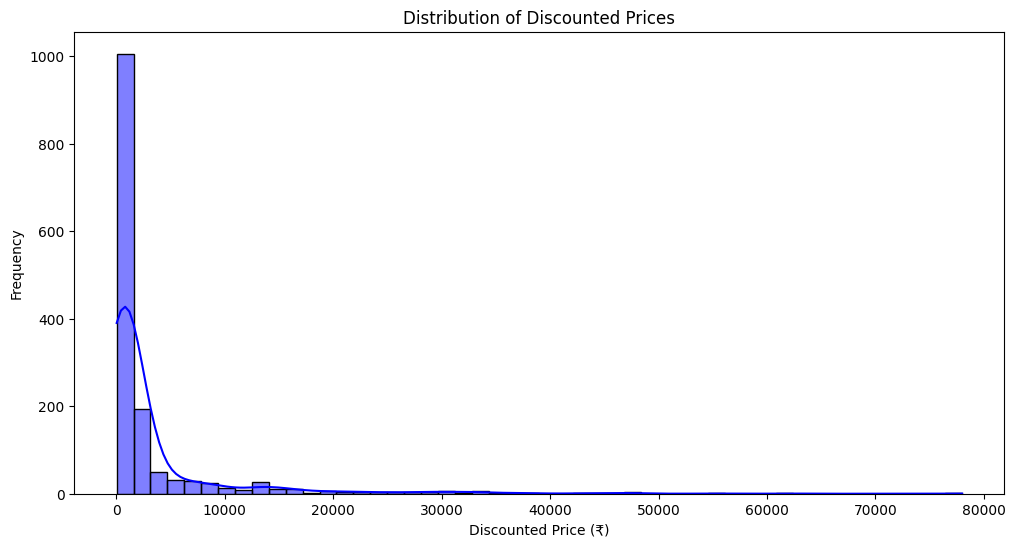

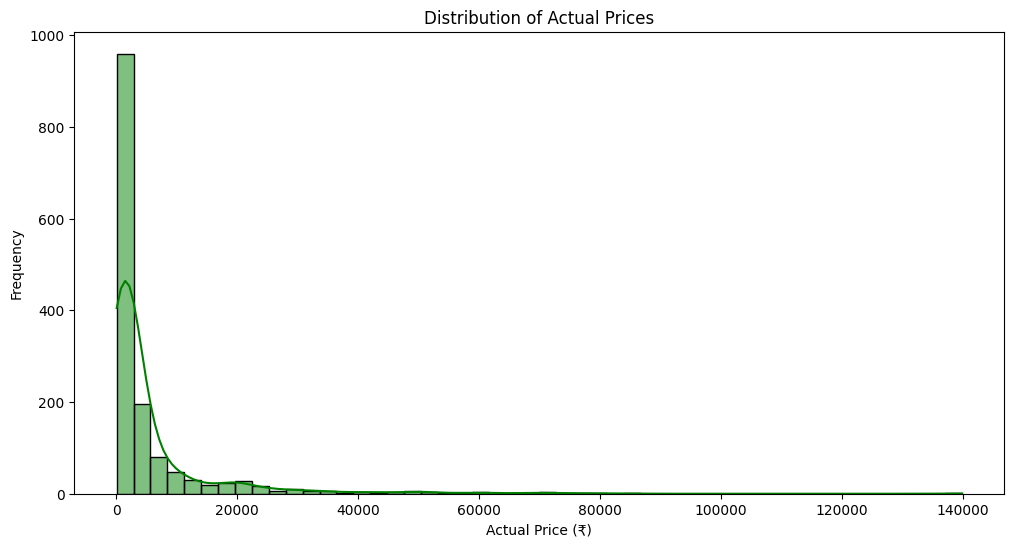

In [21]:
# Plot the distribution of discounted prices
plt.figure(figsize=(12, 6))
sns.histplot(df_amazon['discounted_price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Frequency')


# Plot the distribution of actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df_amazon['actual_price'], bins=50, kde=True, color='green')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Frequency')

<p align="left">
  <img src="EDA plot\plot1.png">
  <br>
</p>  

<p align="left">
  <img src="EDA plot\plot2.png">
  <br>
</p> 

- 1 :The discounted prices show a right-skewed distribution, meaning most products have lower discounted prices with just a few having really high discounts. Most of the discounts are in the **lower range**, so most products get smaller cuts in price. There are a few products with really high discounts (outliers) which could mess with statistical analysis if they’re not handled properly. There’s a wide range in discounted prices, showing a big variety in pricing across different products.


- 2 :  Distribution The actual prices show a right-skewed distribution meaning most products have low prices with just a few having really high prices Concentration Most of the prices are on the lower end so most products have low prices Outliers There are a few products with really high prices (outliers) which could mess with statistical analysis if not handled properly Spread There’s a big spread in prices showing a lot of variety in pricing across different products

***It makes sense since we’re more interested in some products than others***

Text(0, 0.5, 'Frequency')

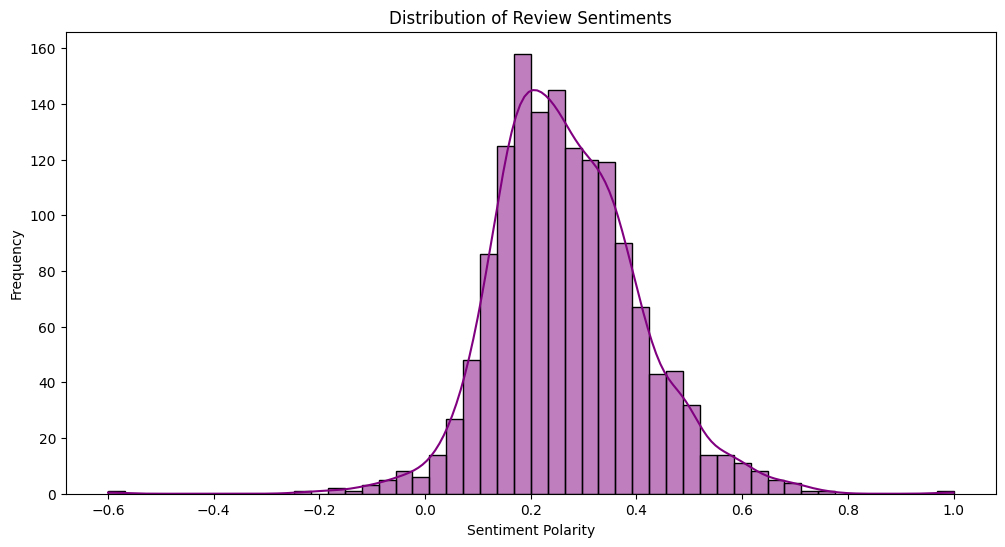

In [22]:
df_amazon['review_sentiment'] = df_amazon['review_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


plt.figure(figsize=(12, 6))
sns.histplot(df_amazon['review_sentiment'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

<p align="left">
  <img src="EDA plot\plot3.png">
  <br>
</p> 

***The distribution looks pretty close to a normal distribution with most opinions clustering around the neutral point (zero) and fewer opinions as we move away from zero in either the positive or negative direction. There’s a slight tilt towards positive opinions with just a bit more positive reviews than negative ones. There are very few reviews with extreme emotional bias (either really positive or really negative).***


***Most online ratings show Voluntary Response Bias in statistics***

In [23]:
category_counts = df_amazon['category'].value_counts().head(10)
category_counts = category_counts.iloc[::-1]



fig1 = px.bar(category_counts,
              x=category_counts.values, y=category_counts.index, 
              text_auto=".2s",
              title="Top 10 Product Categories")


fig1.update_xaxes(title_text  = 'Number of Products')
fig1.update_yaxes(title_text = 'Category')
fig1.update_layout(width = 1200,height = 500,font = dict(family = 'Arial', size = 14, color = 'black'))
fig1.update_traces(textposition = 'outside')

<p align="left">
  <img src="EDA plot\plot4.png">
  <br>
</p> 

***Electronics make up the biggest chunk of sales, especially with a focus on smartphones, smartwatches, and smart TVs. Computers and accessories come in second, mainly focusing on cables, keyboards, and mice. Home appliances include small items like blenders and vacuum cleaners***

In [24]:
high_rating = df_amazon[df_amazon['rating'] > 4]
hight_rating_category = high_rating['category'].value_counts().head(10)
hight_rating_category = hight_rating_category.iloc[::-1]



 
fig2 = px.bar(hight_rating_category,
              x=hight_rating_category.values , y = hight_rating_category.index ,
              text_auto= True,
              title="Top 10 Product Categories with Ratings Above 4")


fig2.update_xaxes(title_text = 'Number of Products')
fig2.update_yaxes(title_text = 'Product Category')
fig2.update_layout(font = dict(family = 'Arial', size = 14, color = 'black'))
fig2.update_traces(textposition = 'outside')

<p align="left">
  <img src="EDA plot\plot5.png">
  <br>
</p> 

***Electronics make up the majority of high-rated products, with a big focus on cables, accessories, and smart devices like smartwatches and smartphones. Computers and their accessories come in second, mainly with keyboards and mice. Home appliances include small items like vacuum cleaners and irons***








In [25]:
fig5 = px.scatter(
    data_frame=df_amazon,
    x='discounted_price',
    y='rating',
    trendline='ols',
    trendline_color_override='red',
    title='Relationship between Discounted Price and Rating'
)


fig5.update_xaxes(title_text='Discounted Price (₹)')
fig5.update_yaxes(title_text='Rating')
fig5.update_layout(font=dict(family='Arial', size=14, color='black'))  
fig5.show()

<p align="left">
  <img src="EDA plot\plot6.png">
  <br>
</p> 

***There's no clear relationship overall, it doesn’t seem like there’s a strong or direct link between the discounted price and the rating. Just because a product is cheaper doesn’t mean it’ll get a better rating, and the same goes the other way. The data points are pretty much scattered randomly on the graph, showing there’s no clear pattern in the relationship between the two variables. You can see that both products with low discounted prices and those with high discounts are getting high ratings, meaning the price alone isn’t enough to decide the product's quality or customer satisfaction.***

In [26]:
category_sales = df_amazon.groupby('category')['discounted_price'].sum().head(5)

fig6= px.pie(category_sales, 
             values=category_sales.values, names=category_sales.index
             ,title='Sales Percentage by Category')

fig6.update_layout(width = 1200 , height = 500,font = dict(family = 'Arial', size = 14, color = 'black'))
fig6.show()

<p align="left">
  <img src="EDA plot\plot7.png">
  <br>
</p> 

***The top-selling category is "CarMotorbikeCarAccessoriesInterior Accessories Air Purifiers" at 38.5%, followed by "ComputersAccessoriesAudioVideoAccessoriesPCSpeakers" at 18.9%, "ComputersAccessoriesAudioVideoAccessoriesPCHeadsets" at 10.7%, USB adapters at 7.3%, and microphones at 4.4%..***